# 1. Download and Imports

In [15]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

# 2. Functions

In [16]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [18]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

# 3. Loading Dataset (Traffic Signs Images)

In [19]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# 4. Data Splitting and conversion

In [20]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# 5. Creating and Compiling the Model

In [21]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0

# 6. Training the Model

In [22]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 [==============================] - 4s 10ms/step - loss: 1.6078 - accuracy: 0.6771 - val_loss: 0.1870 - val_accuracy: 0.9589
Epoch 2/35
246/246 [==============================] - 2s 9ms/step - loss: 0.2155 - accuracy: 0.9447 - val_loss: 0.0767 - val_accuracy: 0.9833
Epoch 3/35
246/246 [==============================] - 2s 9ms/step - loss: 0.1230 - accuracy: 0.9683 - val_loss: 0.0421 - val_accuracy: 0.9904
Epoch 4/35
246/246 [==============================] - 2s 9ms/step - loss: 0.0922 - accuracy: 0.9758 - val_loss: 0.0570 - val_accuracy: 0.9862
Epoch 5/35
246/246 [==============================] - 2s 9ms/step - loss: 0.0902 - accuracy: 0.9766 - val_loss: 0.0389 - val_accuracy: 0.9926
Epoch 6/35
246/246 [==============================] - 2s 9ms/step - loss: 0.0605 - accuracy: 0.9836 - val_loss: 0.0451 - val_accuracy: 0.9906
Epoch 7/35
246/246 [==============================] - 2s 9ms/step - loss: 0.0554 - accuracy: 0.9854 - val_loss: 0.0762 - val_accuracy: 0.9829
Epoch

# 7. Visualizing the performance of the Model during Training Phase

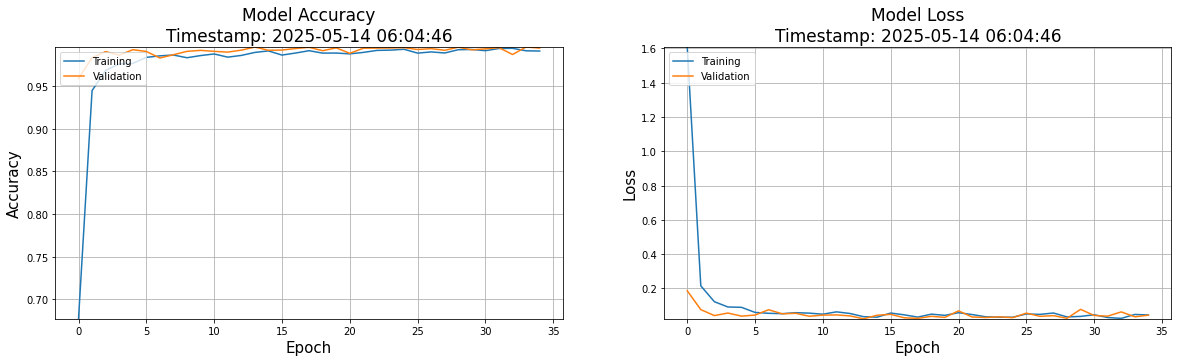

In [23]:
plot_performance(history=history1)

# 8. Loading Test Dataset and Evaluating the Model

In [24]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [5]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

NameError: name 'tf' is not defined

# 9. Saving the Model

In [26]:
# Saving the Model 
model.save('traffic_classifier.h5')

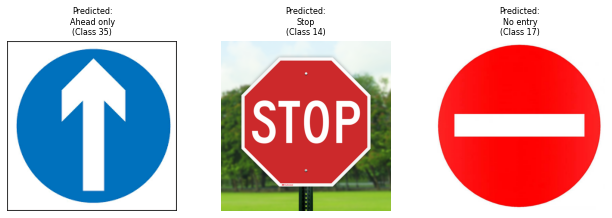

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image  


# ----- LOAD THE TRAINED MODEL -----
model = load_model('/kaggle/input/traffic_signs_model/other/default/1/traffic_classifier.h5')

# ----- CLASS INDEX → TRAFFIC SIGN NAME MAPPING -----
class_names = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing for vehicles over 3.5t",
    11: "Right-of-way at next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5t prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing for vehicles over 3.5t"
}

# ----- TEST IMAGE DIRECTORY -----
test_dir = "/kaggle/input/trafficsign-test-images"
image_size = (30, 30)

# ----- FILTER VALID IMAGE PATHS -----
valid_image_paths = [
    os.path.join(test_dir, fname)
    for fname in os.listdir(test_dir)
    if fname.lower().endswith((".jpg", ".jpeg", ".png"))
]

# ----- LOAD AND NORMALIZE IMAGES -----
images = []
original_images = []

for img_path in valid_image_paths:
    try:
        img = Image.open(img_path).convert('RGB')  # Ensure the image has 3 color channels
        img_resized = img.resize(image_size)
        img_array = np.array(img_resized)  # No normalization (not divided by 255)
        images.append(img_array)
        original_images.append(img)
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

# ----- PREDICTION -----
if not images:
    print("No valid image files were found in the folder.")
else:
    images_np = np.array(images)  # Shape (N, 30, 30, 3)

    # Predict all images in a batch
    predictions = np.argmax(model.predict(images_np), axis=-1)

    # Display results
    plt.figure(figsize=(15, 3 * ((len(original_images) + 4) // 5)))
    for i, img in enumerate(original_images):
        plt.subplot((len(original_images) + 4) // 5, 5, i + 1)
        plt.imshow(img)
        pred_class = predictions[i]
        pred_label = class_names.get(pred_class, f"Unknown Class {pred_class}")
        plt.title(f"Predicted:\n{pred_label}\n(Class {pred_class})", fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


    # ----- OPTIONAL ALTERNATIVE DISPLAY -----
    # plt.figure(figsize=(15, 3 * ((len(images) + 4) // 5)))
    # for i, img in enumerate(images):
    #     plt.subplot((len(images) + 4) // 5, 5, i + 1)
    #     plt.imshow(img.astype(np.uint8))  # Ensure proper display data type
    #     pred_class = predictions[i]
    #     pred_label = class_names.get(pred_class, f"Unknown Class {pred_class}")
    #     plt.title(f"Predicted:\n{pred_label}\n(Class {pred_class})", fontsize=8)
    #     plt.axis('off')
    #
    # plt.tight_layout()
    # plt.show()
